In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans 
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.cluster import SpectralClustering
from sklearn.metrics import r2_score

# Part 1: Plotting Dimensionally-Reduced Data

This part uses the **get_data** and **graph_pca_invitro** functions to get flow cytometry of many different APCms populations and plot dimensionally-reduced data from them to visualize key trends.

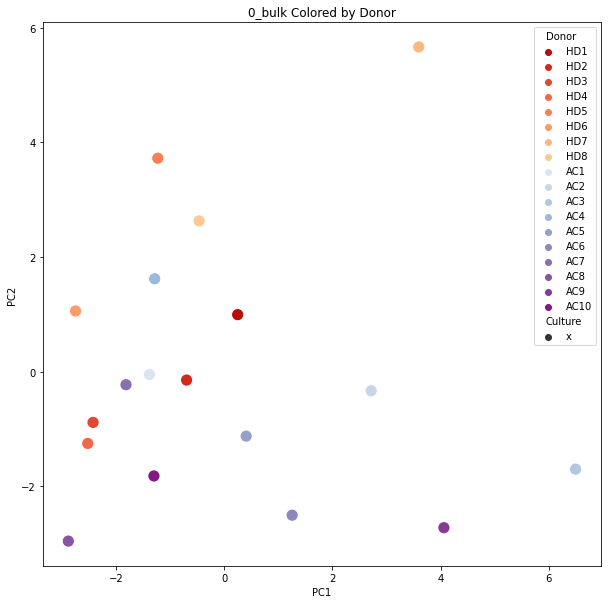

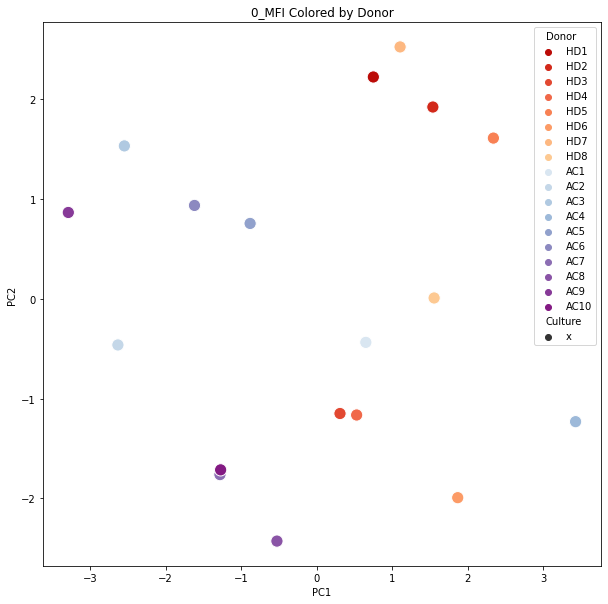

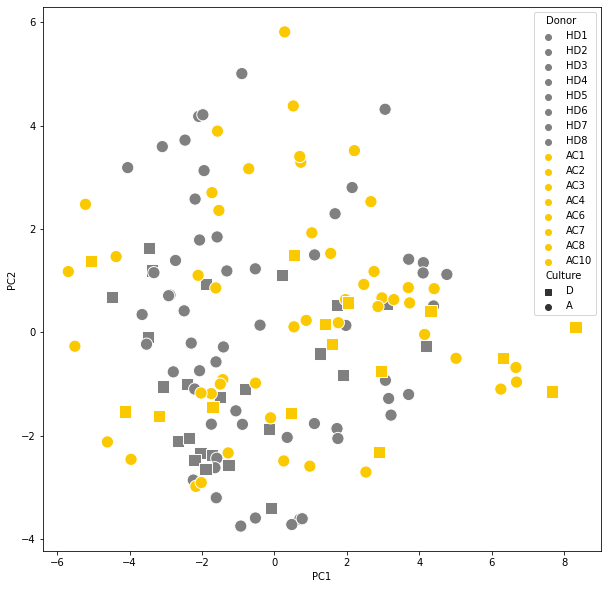

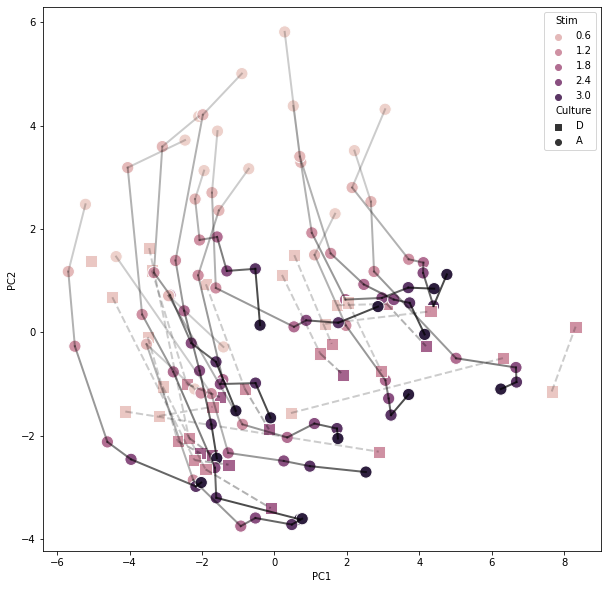

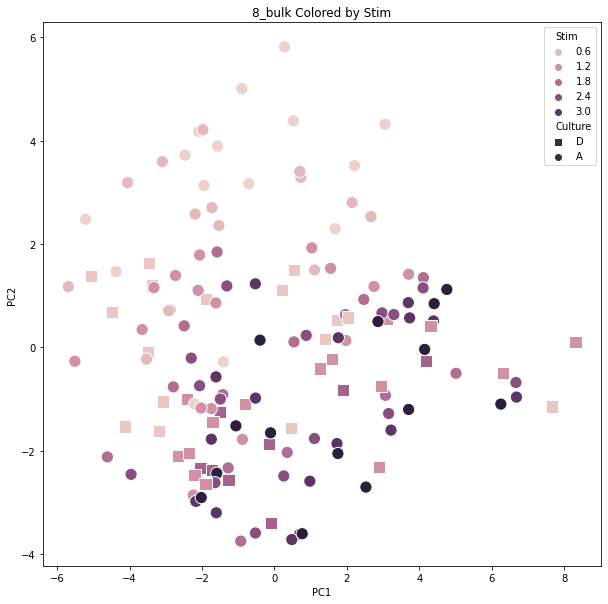

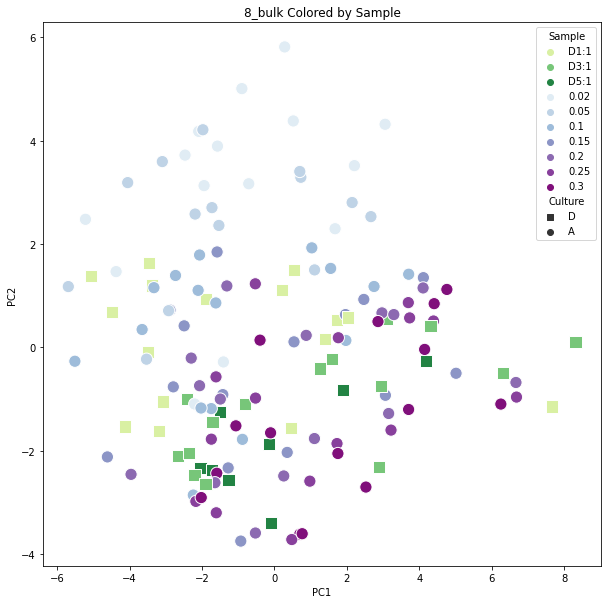

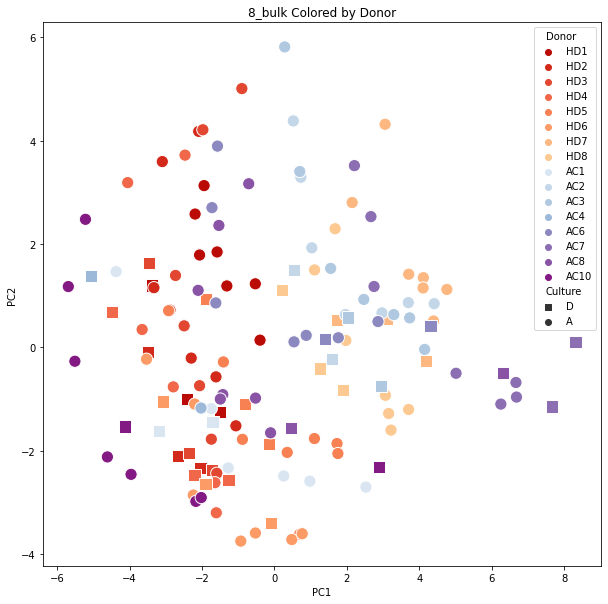

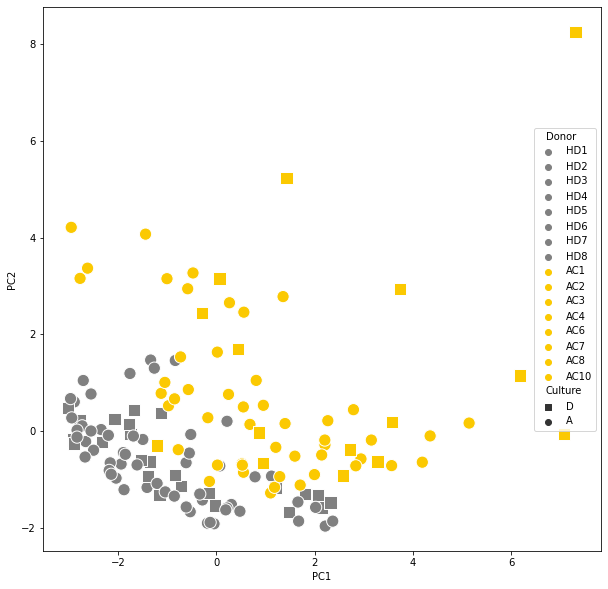

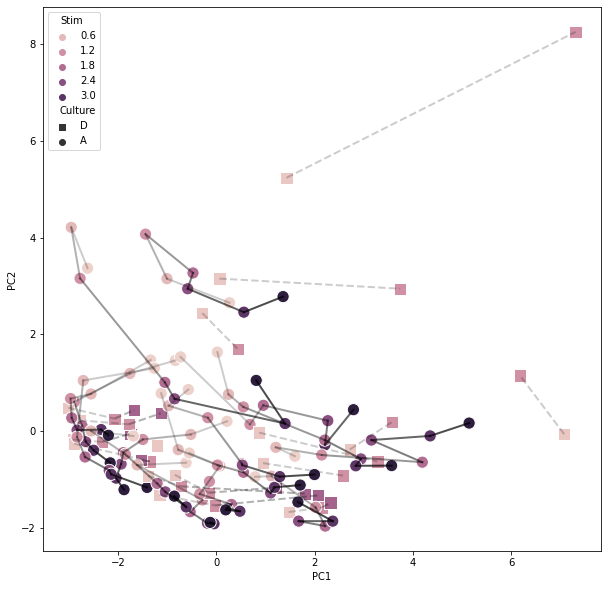

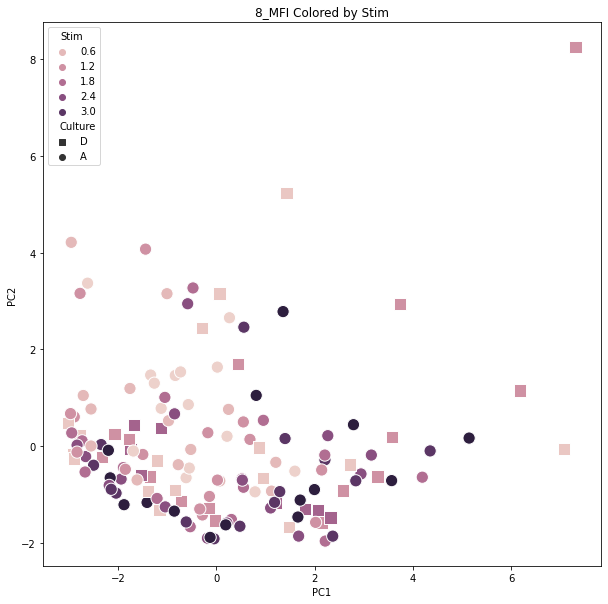

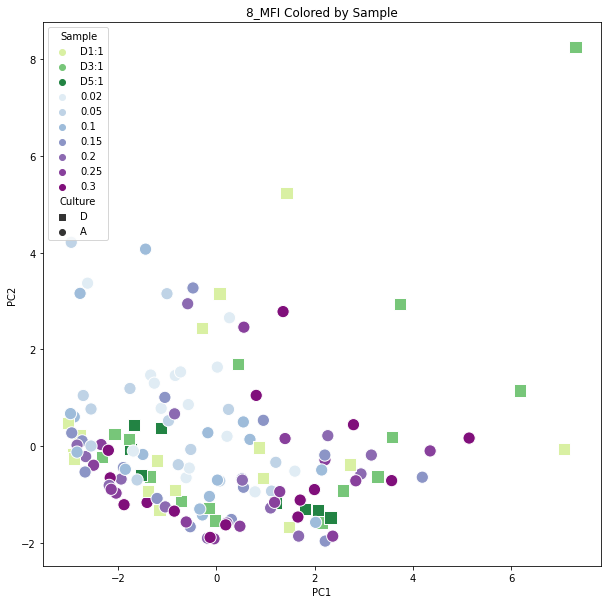

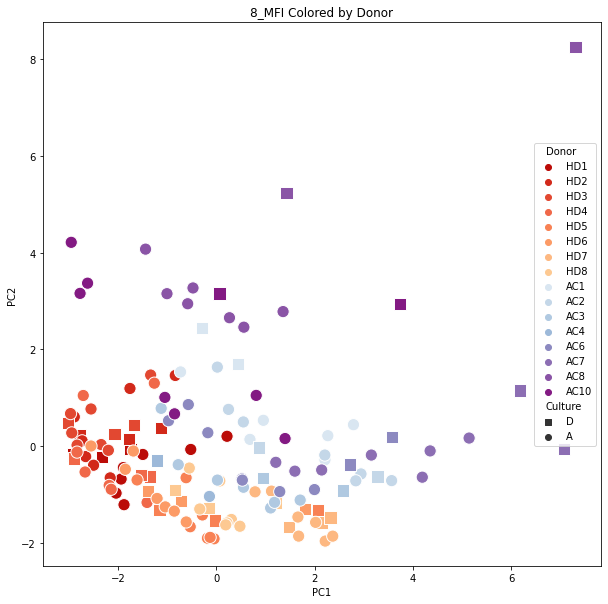

In [2]:
from utils import *


dfs, names= get_data()
donor_dict, sample_dict = produce_color_mapping(dfs[2])


for df, name in zip(dfs, names):
    if name.split('_')[0] == '0':
        palette_dicts= [donor_dict]
        graph_cols = ['Donor']
        graph_pca_invitro(df, name, palette_dicts, graph_cols = graph_cols)
    else:
        palette_dicts= ['none',sample_dict, donor_dict]
        graph_pca_invitro(df, name, palette_dicts)

# Part 2: Clustering and Prediction

Here we will use clustering and different prediction models for three types of predictions.
   1. Is sample X healthy or diseased?
   2. Can the broad phenotype of a T cell product be predicted given its starting phenotype and stimulation dose? 
   2. Given starting phenotype X and end phenotype Y, what stimulation should be applied to X to get Y?

## 1. Is sample X healthy or diseased?

The following code tests different classifiers for their ability to predict whether a day 8 expanded CAR-T product, characterized by the MFI for different surface markers, is from a healthy or diseased patient. Random forest regression performs the best by cross-validation.

Calculating/displaying cross-validation scores for different classifiers:


,Random Forest,MLPC,Decision Tree,Naive Bayes,Nearest Neighbors
0,0.931034,0.724138,0.862069,0.827586,0.571429
1,0.965517,0.689655,0.931034,0.896552,0.714286
2,0.724138,0.827586,0.689655,0.758621,0.535714
3,0.965517,0.758621,0.724138,0.827586,0.642857
4,0.827586,0.724138,0.862069,0.793103,0.642857


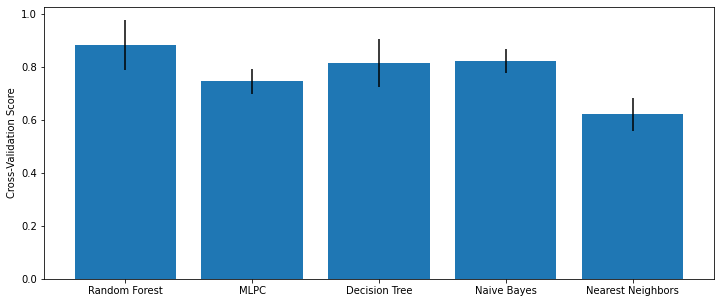

In [3]:
print('Calculating/displaying cross-validation scores for different classifiers:')
classify_ac_hd(dfs[3])

## 2. Can we predict the final product phenotype given the input product phenotype and stimulation? 

Here, we try to predict the cluster of the day 8 product given the day 0 product features and stimulation dose. We can see that different methods are optimal for diseased and healthy products, that the features used for the prediction vary in importance, and that the stimulation dose is the most important feature for this prediction for both healthy and diseased products.

In [ ]:
ac_df, hd_df = donor_separator(dfs[2], day = 8)
d0_ac_df, d0_hd_df = donor_separator(dfs[0], day = 0)

for patient_type, d0_df, d8_df in zip(['Diseased', 'Healthy'],[d0_ac_df, d0_hd_df],[ac_df, hd_df]):
    predict_final_cluster(d0_df, d8_df, patient_type, grid_search = True, use_only_stim = False)

Doing grid search on Random Forest...
{'n_estimators': [200, 800, 1400, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 43, 76, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


## 3. Can we use models to predict what stimulation to give to a certain product?

Given the importance of stimulation and how it varies given the input product, it is important to be able to apply the right stimulation to an input diseased sample to produce a high-quality output product. We trained models to predict stimulation, given the input and output phenotype. The score shown below is an average of many training iterations where a single donor was held out entirely, showing that random forest / ridge models are able to generalize to unseen donors.

Random Forest Regression - Donor Holdout Score: nan
Ridge Regression - Donor Holdout Score: nan
Lasso Regression - Donor Holdout Score: nan
Linear Regression - Donor Holdout Score: nan
Random Forest Regression - Donor Holdout Score: 0.9304346506278572
Ridge Regression - Donor Holdout Score: 0.9635867774281242
Lasso Regression - Donor Holdout Score: -29.399843127275428
Linear Regression - Donor Holdout Score: 0.9780596832910752


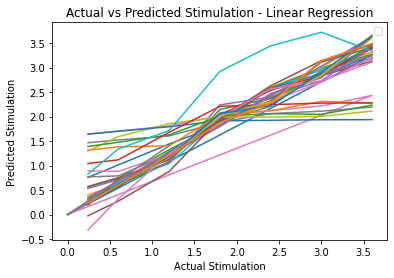

In [5]:
for patient_type, d0_df, d8_df in zip(['Diseased', 'Healthy'],[d0_ac_df, d0_hd_df],[ac_df, hd_df]):
    new_dfs = [d0_df, d8_df]
    predict_stimulation_directly(new_dfs, patient_type, grid_search = False)

In [6]:
ac_df, hd_df = donor_separator(dfs[2], day = 8)
print(ac_df.shape)
print(hd_df.shape)

(49, 29)
(56, 29)


In [9]:
donor2rows

NameError: name 'donor2rows' is not defined